# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Data Preparation

## Loading the dataset

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\CStudy(python)\C ML\Diabetes Diabetic\dataset_diabetes_diabetic_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


## Checking number of features and data present in the dataset

In [3]:
df.shape

(70180, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               70180 non-null  int64 
 1   race                      70180 non-null  object
 2   gender                    70180 non-null  object
 3   age                       70180 non-null  object
 4   admission_type_id         70180 non-null  int64 
 5   discharge_disposition_id  70180 non-null  int64 
 6   admission_source_id       70180 non-null  int64 
 7   time_in_hospital          70180 non-null  int64 
 8   num_lab_procedures        70180 non-null  int64 
 9   num_procedures            70180 non-null  int64 
 10  num_medications           70180 non-null  int64 
 11  number_outpatient         70180 non-null  int64 
 12  number_emergency          70180 non-null  int64 
 13  number_inpatient          70180 non-null  int64 
 14  diag_1                

In [5]:
df.describe(include="all")

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
count,7.018000e+04,70180,70180,70180,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.00000,70180,70180,70180,70180.000000,70180,70180
unique,NaN,6,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685,702,727,NaN,2,2
top,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,428,250,NaN,No,Yes
freq,NaN,51123,38061,18099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4939,4782,8332,NaN,43874,46777
mean,4.589563e+07,NaN,NaN,NaN,2.121730,3.981305,5.926404,4.439370,42.670020,1.350043,15.338772,0.294543,0.156312,0.60513,NaN,NaN,NaN,7.154104,NaN,NaN
std,3.707033e+07,NaN,NaN,NaN,1.532443,5.657360,4.424962,3.032789,19.197482,1.683676,8.071803,1.052725,0.722395,1.22914,NaN,NaN,NaN,1.992406,NaN,NaN
min,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,1.521589e+07,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,5.000000,NaN,NaN
50%,3.572850e+07,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,8.000000,NaN,NaN
75%,8.317725e+07,NaN,NaN,NaN,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,19.000000,0.000000,0.000000,1.00000,NaN,NaN,NaN,9.000000,NaN,NaN


## Checking null values in dataset

In [6]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [7]:
for i in df.columns:
    print(i,df[i].nunique())

patient_nbr 52500
race 6
gender 3
age 10
admission_type_id 8
discharge_disposition_id 26
admission_source_id 13
time_in_hospital 14
num_lab_procedures 116
num_procedures 7
num_medications 74
number_outpatient 29
number_emergency 19
number_inpatient 21
diag_1 685
diag_2 702
diag_3 727
number_diagnoses 16
change 2
diabatic 2


## Dropping the unnecessary data columns and rows

In [8]:
df.drop(['patient_nbr','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
count = 0
for index, row in df.iterrows():
    if row['race'] == '?':
        count += 1
print(count)

1461


In [11]:
df.drop(df.loc[df['race']=='?'].index, inplace=True)

# Splitting data into Categorical & Numerical

In [12]:
df_cat = pd.DataFrame()
df_num = pd.DataFrame()
for y in df.columns:
    if df[y].dtype == object:
        df_cat[y] = df[y]
    else:
        df_num[y] = df[y]

## Finding Correlation on numerical data

In [13]:
corr = df_num.corr()
corr

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.094989,0.206046,-0.021027,-0.156627,0.102511,0.094643,0.062126,-0.005000,-0.033084,-0.093156
discharge_disposition_id,0.094989,1.000000,0.016330,0.157960,0.004132,0.017667,0.113736,-0.015012,-0.026731,0.016869,0.052893
admission_source_id,0.206046,0.016330,1.000000,-0.016140,-0.016498,-0.135859,-0.041585,0.070056,0.082318,0.036220,0.077672
time_in_hospital,-0.021027,0.157960,-0.016140,1.000000,0.285330,0.203993,0.464585,-0.015432,-0.017524,0.078187,0.237663
num_lab_procedures,-0.156627,0.004132,-0.016498,0.285330,1.000000,0.068775,0.239190,-0.015064,-0.015885,0.046696,0.133315
num_procedures,0.102511,0.017667,-0.135859,0.203993,0.068775,1.000000,0.401460,-0.018922,-0.040602,-0.063190,0.082361
num_medications,0.094643,0.113736,-0.041585,0.464585,0.239190,0.401460,1.000000,0.039892,0.012614,0.058819,0.240678
number_outpatient,0.062126,-0.015012,0.070056,-0.015432,-0.015064,-0.018922,0.039892,1.000000,0.115601,0.103822,0.094555
number_emergency,-0.005000,-0.026731,0.082318,-0.017524,-0.015885,-0.040602,0.012614,0.115601,1.000000,0.256232,0.051257
number_inpatient,-0.033084,0.016869,0.036220,0.078187,0.046696,-0.063190,0.058819,0.103822,0.256232,1.000000,0.111181


## Heatmap

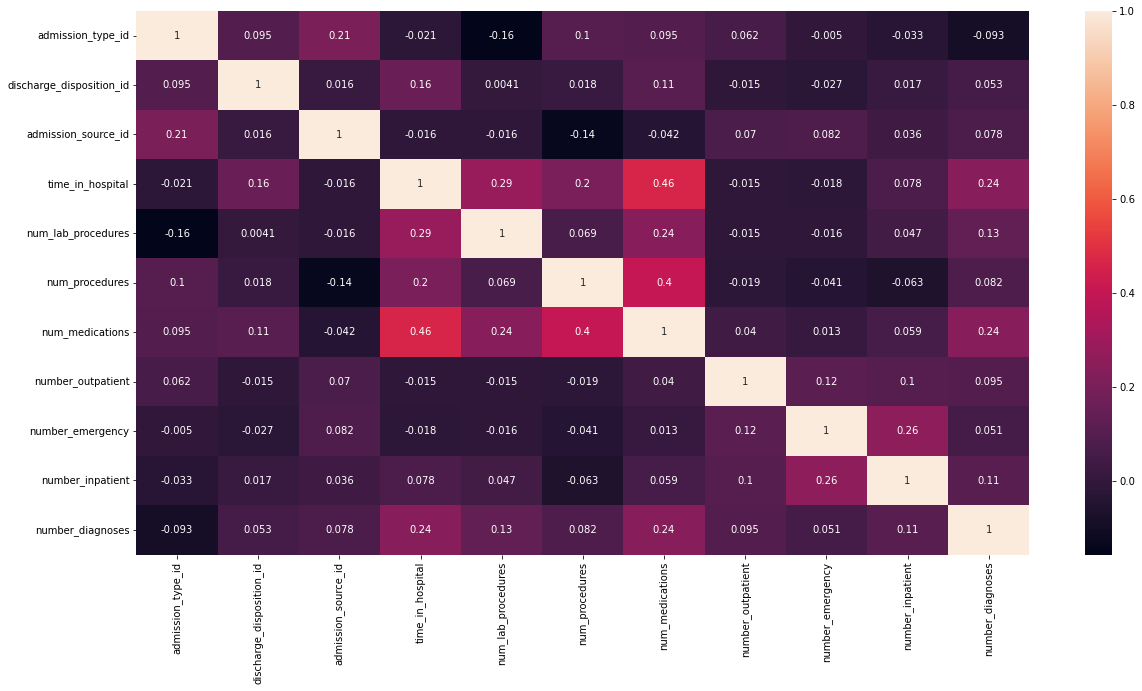

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)
plt.show()

In [15]:
df.shape

(68697, 16)

# Label Encoding

In [16]:
for i in df_cat.columns:
    print(i,"\n",df[i].value_counts())

race 
 Caucasian          51107
AfricanAmerican    15002
Hispanic            1341
Other                874
Asian                373
Name: race, dtype: int64
gender 
 Female             37295
Male               31401
Unknown/Invalid        1
Name: gender, dtype: int64
age 
 [70-80)     17734
[60-70)     14896
[50-60)     11873
[80-90)     11027
[40-50)      6788
[30-40)      2721
[90-100)     1804
[20-30)      1140
[10-20)       559
[0-10)        155
Name: age, dtype: int64
change 
 No    42945
Ch    25752
Name: change, dtype: int64
diabatic 
 Yes    45706
No     22991
Name: diabatic, dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in df_cat.columns:
    df[i] = lb.fit_transform(df[i])
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70174,2,0,8,1,3,7,4,44,0,17,0,0,2,9,1,0
70175,0,0,8,1,3,7,7,60,0,17,0,1,1,9,1,0
70176,0,0,7,1,1,7,3,57,4,11,0,0,1,9,1,0
70177,0,1,9,1,3,7,4,21,1,8,0,0,1,9,1,0


# Splitting of dataset

## Separating target and other features

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,15:]

## Testing - Training Data Split

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Applying DecisionTreeClassifier

## Using Gini Index

In [20]:
ginindex = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)
ginindex.fit(x_train,y_train)
y_pred = ginindex.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred,labels=ginindex.classes_)
print(cm,'\n',accuracy,'\n',classification_report(y_test,y_pred))

[[3824  804]
 [2871 6241]] 
 73.2532751091703 
               precision    recall  f1-score   support

           0       0.57      0.83      0.68      4628
           1       0.89      0.68      0.77      9112

    accuracy                           0.73     13740
   macro avg       0.73      0.76      0.72     13740
weighted avg       0.78      0.73      0.74     13740



[Text(0.46875, 0.9166666666666666, 'X[14] <= 0.5\ngini = 0.445\nsamples = 54957\nvalue = [18363, 36594]'),
 Text(0.4375, 0.75, 'gini = 0.0\nsamples = 20580\nvalue = [0, 20580]'),
 Text(0.5, 0.75, 'X[9] <= 7.5\ngini = 0.498\nsamples = 34377\nvalue = [18363, 16014]'),
 Text(0.25, 0.5833333333333334, 'X[13] <= 5.5\ngini = 0.462\nsamples = 5890\nvalue = [3760, 2130]'),
 Text(0.125, 0.4166666666666667, 'X[2] <= 2.5\ngini = 0.497\nsamples = 2499\nvalue = [1347, 1152]'),
 Text(0.0625, 0.25, 'X[8] <= 0.5\ngini = 0.419\nsamples = 351\nvalue = [105, 246]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.374\nsamples = 305\nvalue = [76, 229]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.466\nsamples = 46\nvalue = [29, 17]'),
 Text(0.1875, 0.25, 'X[9] <= 3.5\ngini = 0.488\nsamples = 2148\nvalue = [1242, 906]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.416\nsamples = 437\nvalue = [308, 129]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.496\nsamples = 1711\nvalue = [934, 777]'),
 Text(0.37

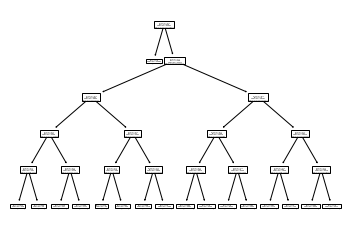

In [21]:
tree.plot_tree(ginindex)

## Using Entropy

In [22]:
entropy = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)
entropy.fit(x_train,y_train)
y_pred_entropy = entropy.predict(x_test)
cm = confusion_matrix(y_test,y_pred_entropy,labels=entropy.classes_)
accuracy = accuracy_score(y_test,y_pred)*100
print(cm,'\n',accuracy)
print(classification_report(y_test,y_pred))

[[3824  804]
 [2871 6241]] 
 73.2532751091703
              precision    recall  f1-score   support

           0       0.57      0.83      0.68      4628
           1       0.89      0.68      0.77      9112

    accuracy                           0.73     13740
   macro avg       0.73      0.76      0.72     13740
weighted avg       0.78      0.73      0.74     13740



[Text(0.46875, 0.9166666666666666, 'X[14] <= 0.5\nentropy = 0.919\nsamples = 54957\nvalue = [18363, 36594]'),
 Text(0.4375, 0.75, 'entropy = 0.0\nsamples = 20580\nvalue = [0, 20580]'),
 Text(0.5, 0.75, 'X[9] <= 7.5\nentropy = 0.997\nsamples = 34377\nvalue = [18363, 16014]'),
 Text(0.25, 0.5833333333333334, 'X[13] <= 5.5\nentropy = 0.944\nsamples = 5890\nvalue = [3760, 2130]'),
 Text(0.125, 0.4166666666666667, 'X[2] <= 2.5\nentropy = 0.996\nsamples = 2499\nvalue = [1347, 1152]'),
 Text(0.0625, 0.25, 'X[8] <= 0.5\nentropy = 0.88\nsamples = 351\nvalue = [105, 246]'),
 Text(0.03125, 0.08333333333333333, 'entropy = 0.81\nsamples = 305\nvalue = [76, 229]'),
 Text(0.09375, 0.08333333333333333, 'entropy = 0.95\nsamples = 46\nvalue = [29, 17]'),
 Text(0.1875, 0.25, 'X[9] <= 3.5\nentropy = 0.982\nsamples = 2148\nvalue = [1242, 906]'),
 Text(0.15625, 0.08333333333333333, 'entropy = 0.875\nsamples = 437\nvalue = [308, 129]'),
 Text(0.21875, 0.08333333333333333, 'entropy = 0.994\nsamples = 1711\nva

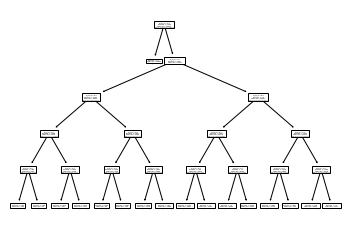

In [23]:
tree.plot_tree(entropy)

## Using GridSearchCV

In [24]:
tree_para = {'criterion':['gini','entropy'],'max_depth':np.arange(3, 15)}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [25]:
print(clf.best_params_)
print(clf.score(x_test,y_test)*100)

{'criterion': 'entropy', 'max_depth': 9}
73.90829694323145


## AUC-ROC Curve

In [26]:
y_score = clf.predict_proba(x_test)[:,1]
y_score

array([1.        , 0.40688576, 0.26310484, ..., 0.43067547, 0.45945946,
       1.        ])

In [27]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score: ', roc_auc_score(y_test, y_score)*100)

roc_auc_score:  83.37398236523418


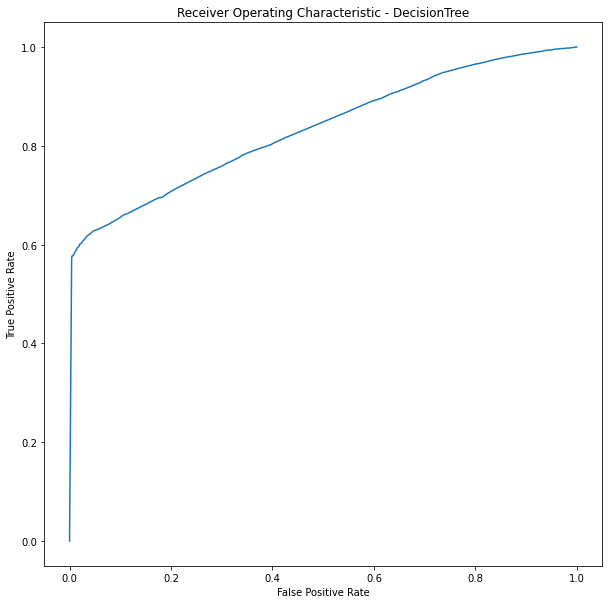

In [28]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Applying RandomForest

In [29]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred,labels=rf.classes_)
print(accuracy_score(y_test,y_pred),"\n",cm)
print(classification_report(y_test,y_pred))

C:\Users\Dell\AppData\Local\Temp/ipykernel_1416/1134369792.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.74745269286754 
 [[3100 1528]
 [1942 7170]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      4628
           1       0.82      0.79      0.81      9112

    accuracy                           0.75     13740
   macro avg       0.72      0.73      0.72     13740
weighted avg       0.75      0.75      0.75     13740



# Model Comparison

In [30]:
comparison = pd.DataFrame({
    "Gini Index":{'Accuracy':accuracy},
    "Using Entropy":{'Accuracy':accuracy},
    "GridSearchCV":{'Accuracy':(clf.score(x_test,y_test)*100)},
    "AUC-ROC Curve":{'Accuracy':(roc_auc_score(y_test, y_score)*100)},
    "RandomForest":{'Accuracy':(accuracy_score(y_test,y_pred)*100)}}).T
comparison

,Accuracy
Gini Index,73.253275
Using Entropy,73.253275
GridSearchCV,73.908297
AUC-ROC Curve,83.373982
RandomForest,74.745269
